In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
from nltk.corpus import stopwords

# Removing stop words
stop_words = stopwords.words('english')

### Intermediate Texts (965 texts)

In [4]:
my_intermediate = []
f = open('Intermediate_100_965','r')

for line in f:
    my_intermediate.append(line.strip())
len(my_intermediate)

965

In [5]:
int_tokenized = []
for sentence in my_intermediate:
    sentence = sentence.lower().split()
    int_tokenized.append(sentence)

In [6]:
int_tokenized_new = []
for line in int_tokenized:
    line = [w for w in line if w not in stop_words]
    int_tokenized_new.append(line)

In [7]:
len(int_tokenized_new)

965

In [8]:
int_score = []
for i in range(0,len(int_tokenized_new)-1):
    distance = word2vec.wmdistance(int_tokenized_new[i], int_tokenized_new[i+1])
    int_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distance}')

Text(0, 0.5, 'Density')

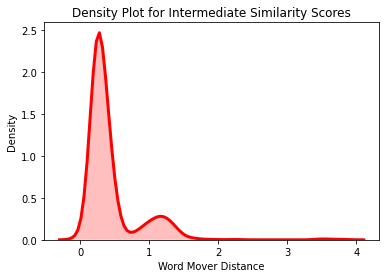

In [9]:
# Density Plot and Histogram of all benign scores
sns.distplot(int_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
plt.title('Density Plot for Intermediate Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

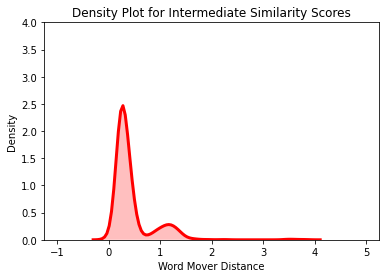

In [10]:
sns.distplot(int_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-1.25, 5.25),ylim=(0, 4))
plt.title('Density Plot for Intermediate Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

In [11]:
max(int_score)

3.808264637612566

In [12]:
all_score = []
for i in int_score:
    all_score.append(i)

In [13]:
import time

In [14]:
min_val =  min(all_score)
max_val = max(all_score)
start = time.time()
for i, val in enumerate(all_score):
    all_score[i] = (val-min_val) / (max_val - min_val)
end = time.time()

total = end - start
print(f"time taken is {total}")

time taken is 0.0


Text(0, 0.5, 'Density')

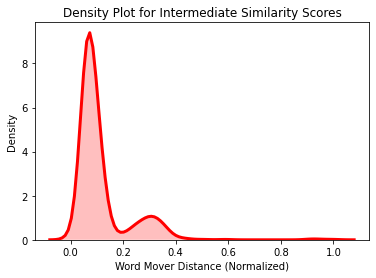

In [15]:
# Density Plot and Histogram of all normalized benign scores
sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.2, 1.3),ylim=(0, 10))
plt.title('Density Plot for Intermediate Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

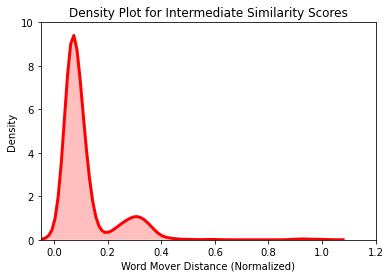

In [16]:
sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.05, 1.2),ylim=(0, 10))
plt.title('Density Plot for Intermediate Similarity Scores')
plt.xlabel('Word Mover Distance (Normalized)')
plt.ylabel('Density')

In [17]:
with open('06_int100_file_new_norm.txt', 'w') as f:
    for item in all_score:
        f.write("%s\n" % item)